In [ ]:
# Air Passengers
# 1949년 ~ 1960년 매달 비행기 탑승객 수에 대한 시계열 데이터
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv(r'../input/ysp-koreauniv-tutorial/AirPassengers.csv',index_col=0)
df

In [ ]:
df.index = pd.to_datetime(df.index) # index를 시간형으로 변환

In [ ]:
df

In [ ]:
df.plot()
plt.show()

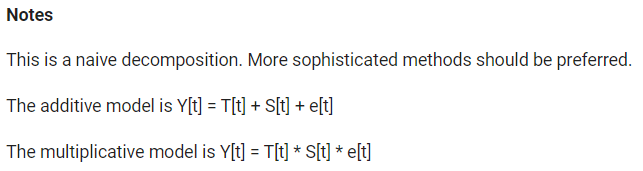

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose # 위 markdown 수식에 따라 원본 데이터를 추세, 계절성, 잔차로 분해
result = seasonal_decompose(df, model='multiplicative',period=12)
plt.rcParams['figure.figsize'] = [12, 8]
result.plot(observed=True, seasonal=True, trend=True, resid=True)
plt.show()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df, model='additive',period=12)
plt.rcParams['figure.figsize'] = [12, 8]
result.plot(observed=True, seasonal=True, trend=True, resid=True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df, test_size = 0.2, shuffle = False) # 중요 shuffle = False

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fit1 = ExponentialSmoothing(train_data, trend=None, seasonal= None, freq = 'MS')
fit1 = fit1.fit()

fit2 = ExponentialSmoothing(train_data, trend='add', seasonal= None, freq = 'MS')
fit2 = fit2.fit()

fit3 = ExponentialSmoothing(train_data, trend='mul', seasonal= None, freq = 'MS')
fit3 = fit3.fit()

fit4 = ExponentialSmoothing(train_data, trend=None, seasonal= 'add', freq = 'MS')
fit4 = fit4.fit()

fit5 = ExponentialSmoothing(train_data, trend='add', seasonal= 'add', freq = 'MS')
fit5 = fit5.fit()

fit6 = ExponentialSmoothing(train_data, trend='mul', seasonal= 'add', freq = 'MS')
fit6 = fit6.fit()

fit7 = ExponentialSmoothing(train_data, trend=None, seasonal= 'multiplicative', seasonal_periods=12,freq = 'MS')
fit7 = fit7.fit()

fit8 = ExponentialSmoothing(train_data, trend='add', seasonal= 'multiplicative', seasonal_periods=6, freq = 'MS')
fit8 = fit8.fit()

fit9 = ExponentialSmoothing(train_data.values, trend='add', seasonal= 'mul', seasonal_periods=6, 
                            damped=True, initialization_method="estimated", missing='none')
fit9 = fit9.fit()

## additive 홀트윈터

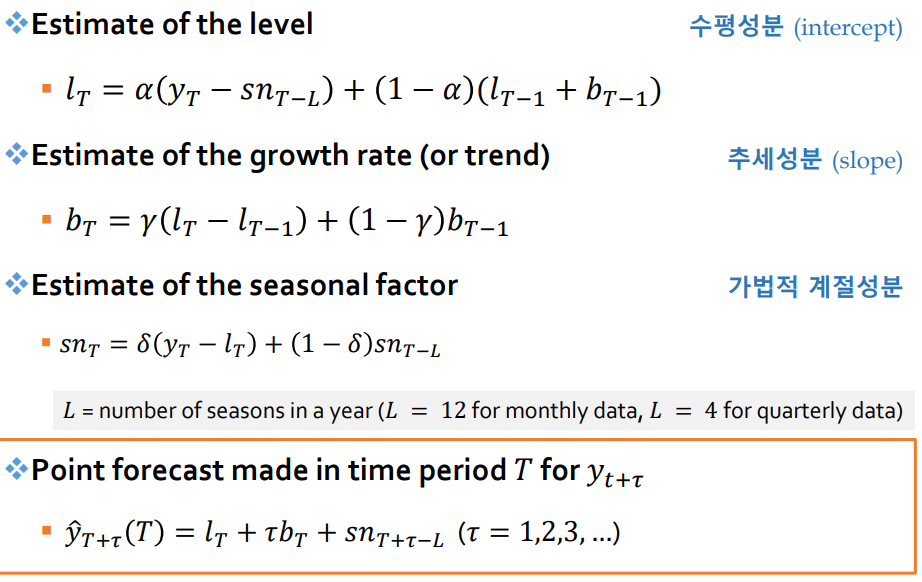

## multiplicative 홀트윈터
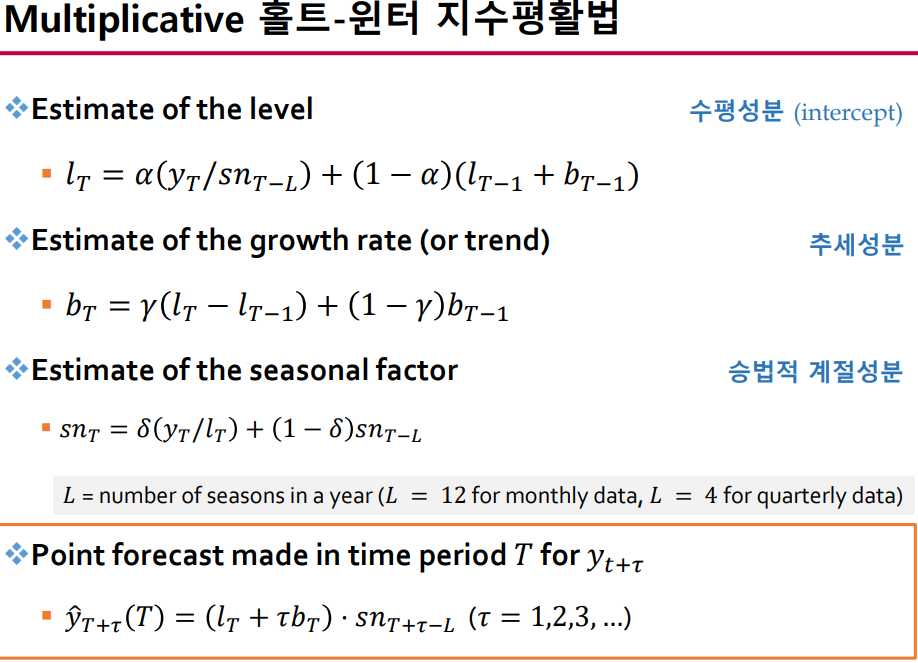

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
trends = [None, 'add', 'mul']
seasonals = [None, 'add', 'mul']
ESmodels = []
titles=[]
for i in trends:
    for j in seasonals:
        print(i,j)
        titles.append((i,j)) # 그래프를 그리기 위해 trend와 seasonal을 어떤 변수로 넣었는지 확인하기 위해
        ESmodels.append(ExponentialSmoothing(train_data, trend=i, seasonal= j, freq = 'MS').fit())

In [ ]:
from sklearn.metrics import r2_score
predicted_values = []
r2_scores = []
for i in range(len(ESmodels)):
    predicted_values.append(ESmodels[i].predict(start = pd.to_datetime('1958-08-01'), end = pd.to_datetime('1960-12-01'))) # start 날짜부터 end 날짜까지 기간을 예측
    try:
        r2_scores.append(r2_score(test_data, predicted_values[-1]))
    except:
        r2_scores.append(-5)
        continue

In [ ]:
r2_scores

In [ ]:
predict_index = list(test_data.index)
fig, ax = plt.subplots(figsize=(18,6))
# df.plot(ax=ax);
ax.plot(df.index, df) # train, test가 함께 있는 원본 데이터
ax.vlines(pd.to_datetime('1958-08-01'), 100, 650, linestyle='--', color='r', label = 'Start of Forecast') # train 데이터와 test 데이터의 경계부분 표시
for i in range(len(predicted_values)):
    ax.plot(predict_index, predicted_values[i], label = 'Prediction') # test부분에 대한 예측결과 표시
# ax.fill_between(predict_index, predicted_lb, predicted_ub, color='k', alpha=0.1, label='0.95 Prediction Interval')
plt.show()

for i in range(len(predicted_values)):
    fig, ax = plt.subplots(figsize=(18,6))
    # df.plot(ax=ax);
    ax.plot(df.index, df)
    ax.vlines(pd.to_datetime('1958-08-01'), 100, 650, linestyle='--', color='r', label = 'Start of Forecast')

    ax.plot(predict_index, predicted_values[i], label = 'Prediction')
    plt.title('{}, r2_score: {}'.format(titles[i], r2_scores[i]))
    # ax.fill_between(predict_index, predicted_lb, predicted_ub, color='k', alpha=0.1, label='0.95 Prediction Interval')
    plt.show()

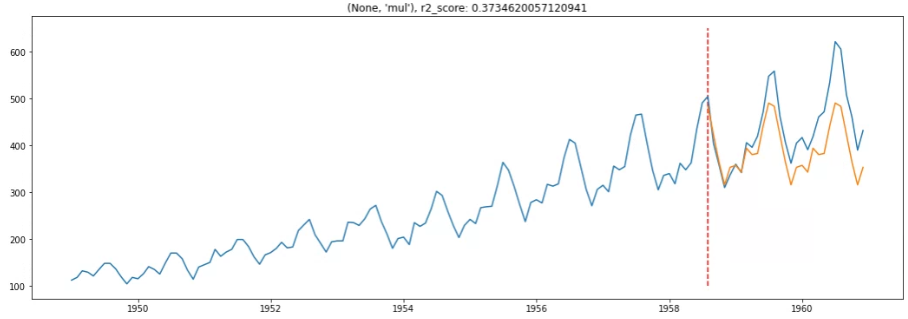

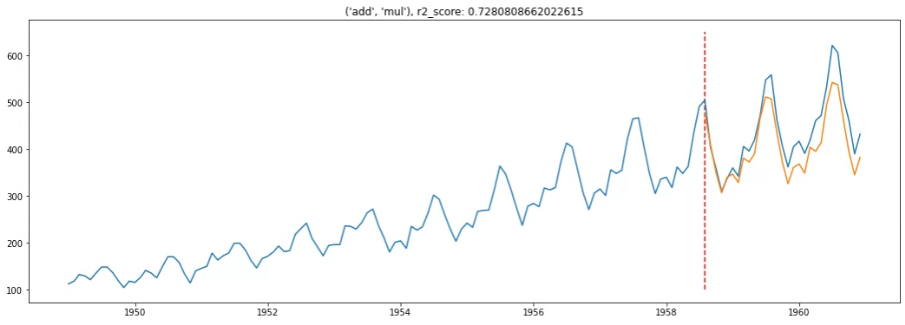

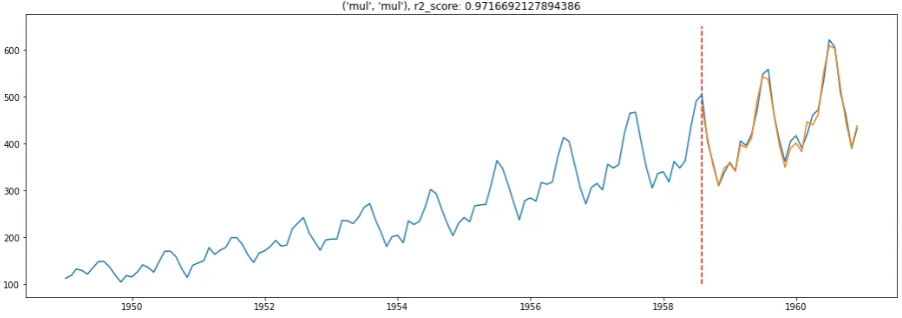